Importing Libraries

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore') 

Data Collection

In [84]:
Autism_Data=pd.read_csv('Autism_data.csv')
Autism_Data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


Data Preparation

In [85]:
Autism_Data.shape

(800, 22)

In [86]:
Autism_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [87]:
Autism_Data.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


In [88]:
Autism_Data.isnull().sum()

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [89]:
Autism_Data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [90]:
Autism_Data['relation'].value_counts()

relation
Self                        709
?                            40
Parent                       29
Relative                     18
Others                        2
Health care professional      2
Name: count, dtype: int64

In [91]:
Autism_Data['age']=Autism_Data['age'].astype('int64')
Autism_Data.drop(columns=['ID','age_desc'],axis=1,inplace=True)
Autism_Data.replace({
    'gender':{'m':0,'f':1},
    'ethnicity':{'others':'Others','?':'Others'},
    'jaundice':{'no':0,'yes':1},
    'austim':{'no':0,'yes':1},
    'used_app_before':{'no':0,'yes':1},
    'relation':{'?':'Others','Parent':'Others','Relative':'Others','Health care professional':'Others'}
},inplace=True)

In [92]:
Autism_Data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,1,Others,0,0,Austria,0,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,0,Others,0,0,India,0,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,0,White-European,0,1,United States,0,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,1,Others,0,0,United States,0,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,0,Others,0,0,South Africa,0,-4.777286,Self,0


In [93]:
Autism_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         800 non-null    int64  
 1   A2_Score         800 non-null    int64  
 2   A3_Score         800 non-null    int64  
 3   A4_Score         800 non-null    int64  
 4   A5_Score         800 non-null    int64  
 5   A6_Score         800 non-null    int64  
 6   A7_Score         800 non-null    int64  
 7   A8_Score         800 non-null    int64  
 8   A9_Score         800 non-null    int64  
 9   A10_Score        800 non-null    int64  
 10  age              800 non-null    int64  
 11  gender           800 non-null    int64  
 12  ethnicity        800 non-null    object 
 13  jaundice         800 non-null    int64  
 14  austim           800 non-null    int64  
 15  contry_of_res    800 non-null    object 
 16  used_app_before  800 non-null    int64  
 17  result          

<Axes: xlabel='relation', ylabel='count'>

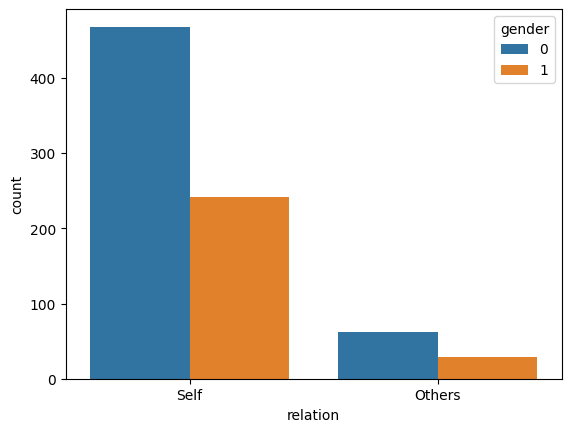

In [94]:
sns.countplot(x=Autism_Data['relation'],data=Autism_Data,hue=Autism_Data['gender'])

<Axes: xlabel='ethnicity', ylabel='count'>

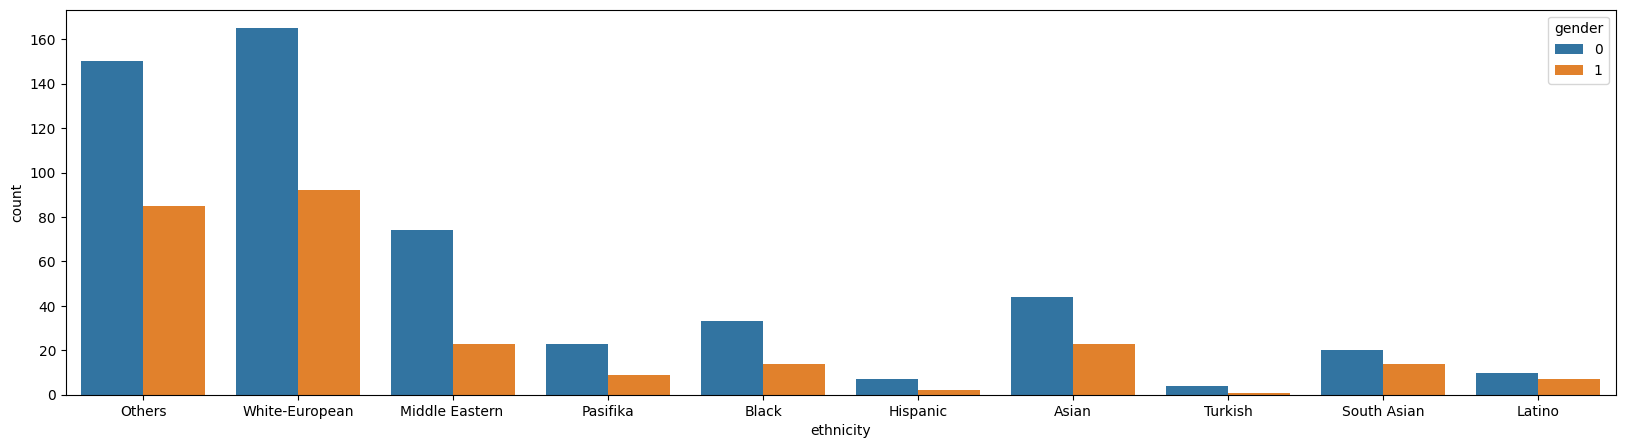

In [95]:
plt.figure(figsize=(20,5))
sns.countplot(x=Autism_Data['ethnicity'],data=Autism_Data,hue=Autism_Data['gender'])

<Axes: xlabel='austim', ylabel='count'>

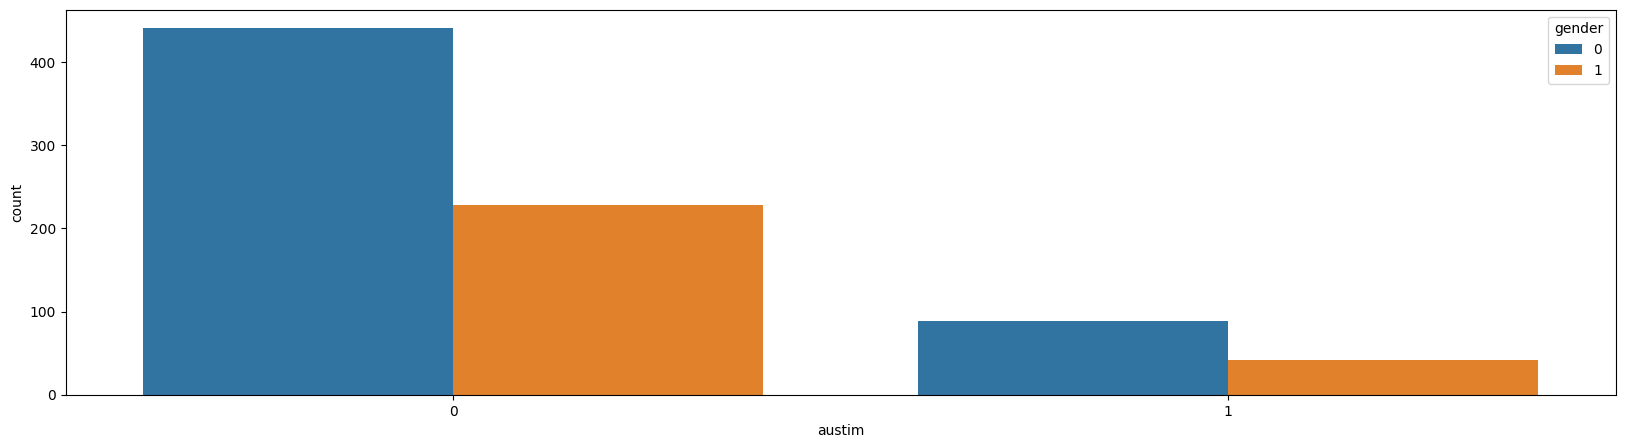

In [96]:
plt.figure(figsize=(20,5))
sns.countplot(x=Autism_Data['austim'],data=Autism_Data,hue=Autism_Data['gender'])

<Axes: xlabel='Class/ASD', ylabel='count'>

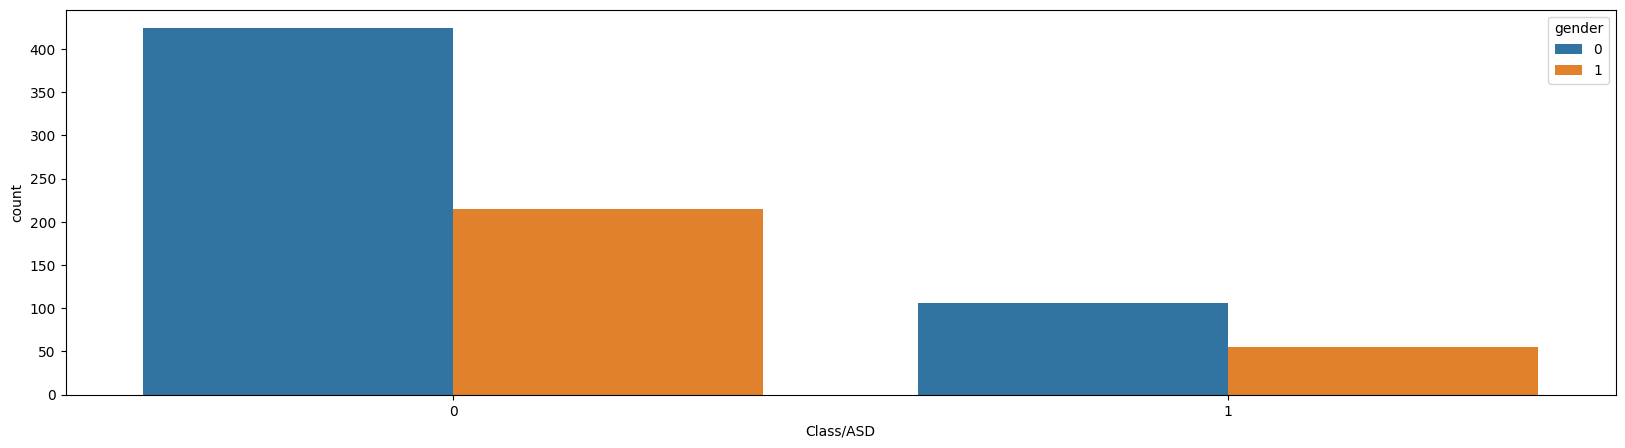

In [97]:
plt.figure(figsize=(20,5))
sns.countplot(x=Autism_Data['Class/ASD'],data=Autism_Data,hue=Autism_Data['gender'])

<Axes: ylabel='Density'>

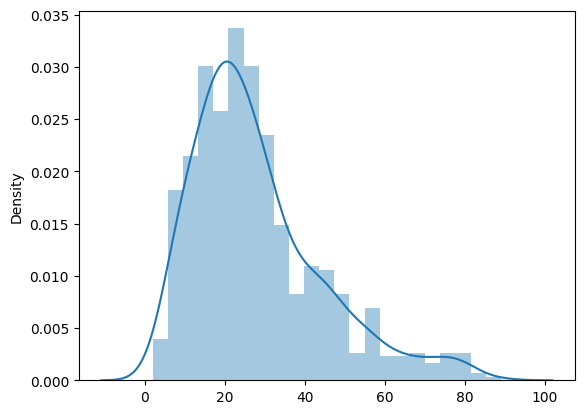

In [98]:

sns.distplot(x=Autism_Data['age'],kde=True)

In [99]:
Autism_Data.replace({
    'relation':{'Self':0,'Others':1}
},inplace=True)

In [100]:
encoder=LabelEncoder()
Autism_Data['ethnicity']=encoder.fit_transform(Autism_Data['ethnicity'])
Autism_Data['contry_of_res']=encoder.fit_transform(Autism_Data['contry_of_res'])

In [101]:
Autism_Data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,1,5,0,0,7,0,6.351166,0,0
1,0,0,0,0,0,0,0,0,0,0,47,0,5,0,0,25,0,2.255185,0,0
2,1,1,1,1,1,1,1,1,1,1,7,0,9,0,1,54,0,14.851484,0,1
3,0,0,0,0,0,0,0,0,0,0,23,1,5,0,0,54,0,2.276617,0,0
4,0,0,0,0,0,0,0,0,0,0,43,0,5,0,0,46,0,-4.777286,0,0


<Axes: >

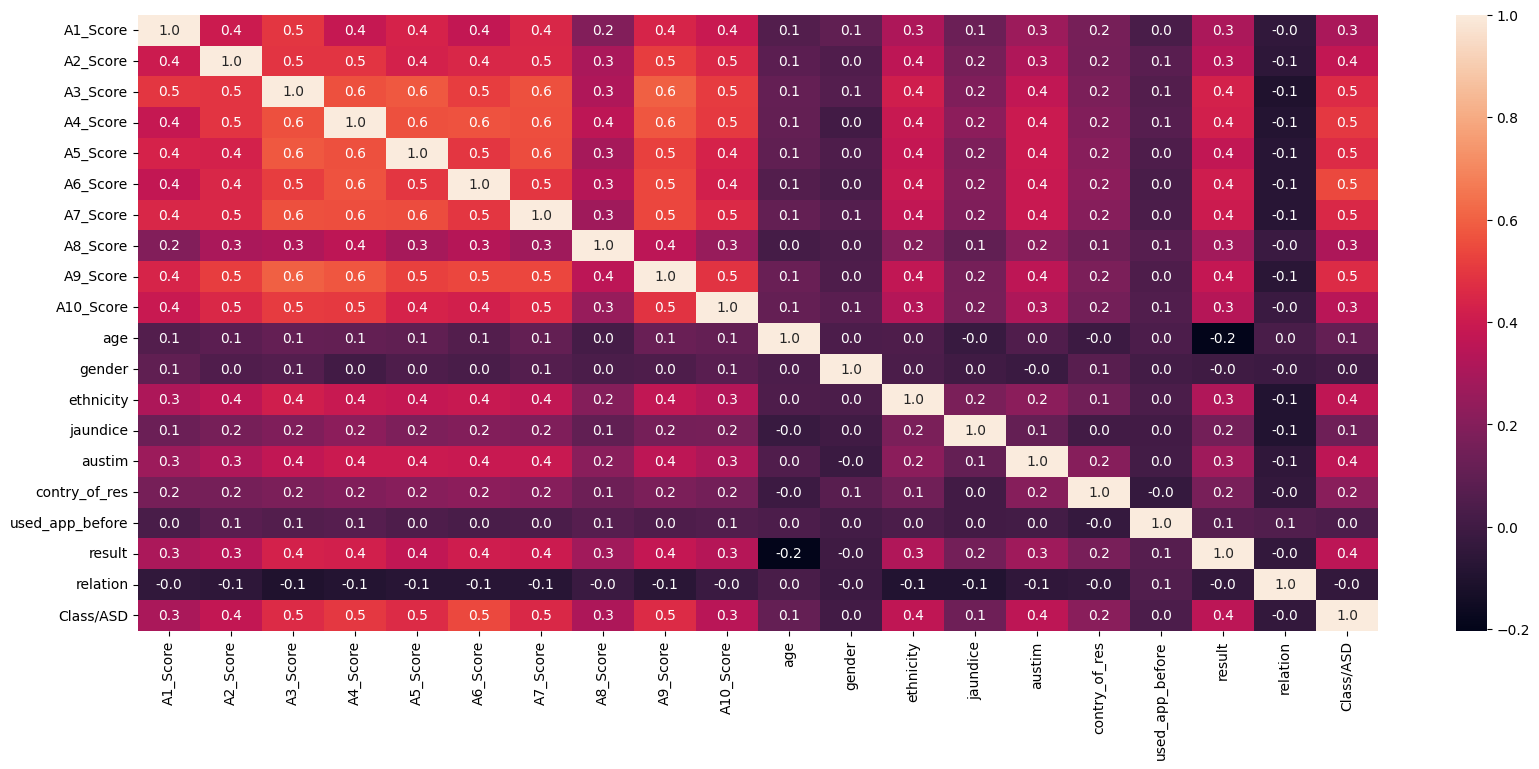

In [105]:
plt.figure(figsize=(20,8))
corr=Autism_Data.corr()
sns.heatmap(data=corr,annot=True,fmt='0.1f')